### Récupération d'une image

(128, 103, 4)

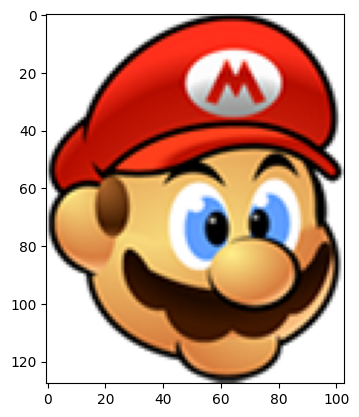

In [6]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('mario.png')

display(img.shape)
plt.imshow(img)
plt.show()

### Compression de l'image par Mean Shift

##### Redimensionnement en matrice bidimensionnelle

In [7]:
# 1 ligne = 1 pixel = 1 observation
# On va clusteriser les 4 colonnes représentant la couleur
X = img.reshape((img.shape[0]*img.shape[1],img.shape[2]))


##### Entraînement Modèle Mean Shift

In [39]:
from sklearn.cluster import MeanShift,estimate_bandwidth

# Estimation de la bande passante
bandwidth = estimate_bandwidth(X, quantile = 0.1, n_samples = 500)

# Entraînement du modèle 
ms = MeanShift(bandwidth = bandwidth)
ms.fit(X)

# Calcul des centroïds et des labels
centroids = ms.cluster_centers_
labels = ms.labels_

##### Remplacement des colonnes par leur centroïde

In [44]:
X_compress = np.zeros(X.shape)
for i in range(0,X.shape[0]):
    X_compress[i,:]=centroids[labels[i]]

print (centroids)
print ("\n")
print (X[8000],X[8001])
print (X_compress[8000],X_compress[8001])

[[0.9977311  0.9978642  0.9978936  1.        ]
 [0.9409231  0.73679006 0.40984666 1.        ]
 [0.758903   0.07853027 0.01980953 1.        ]
 [0.06879044 0.02483749 0.00712247 1.        ]
 [0.9720345  0.19016606 0.09775124 1.        ]
 [0.47512582 0.30086395 0.14306982 1.        ]
 [0.36194292 0.20165214 0.08138023 1.        ]
 [0.6982836  0.47633985 0.25901502 1.        ]
 [0.36871755 0.62295294 0.99785936 1.        ]
 [0.63831407 0.64651763 0.6449771  1.        ]
 [0.45729083 0.07426193 0.02758623 1.        ]
 [0.74980015 0.7603833  0.7597045  1.        ]
 [0.2860929  0.28435007 0.27926657 1.        ]
 [0.37140906 0.37332425 0.3738258  1.        ]
 [0.5497614  0.73100144 0.99660844 1.        ]
 [0.90996736 0.4482026  0.40490195 1.        ]
 [0.27468035 0.47519177 0.7631713  1.        ]
 [0.91372555 0.3473389  0.29000935 1.        ]
 [0.20336135 0.30532214 0.4627451  1.        ]
 [0.5222223  0.65882355 0.84052294 1.        ]]


[0.6313726 0.5254902 0.2784314 1.       ] [0.48235294 0.4

### Décompression et affichage

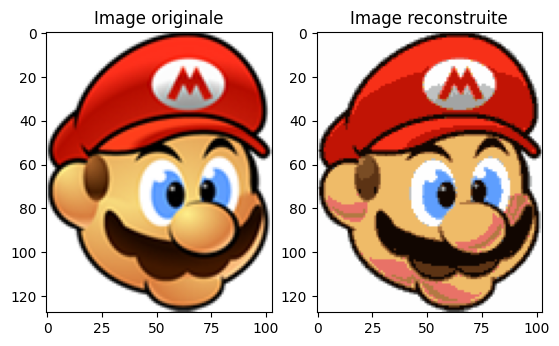

In [45]:
# Redimensionnement en matrice tridimensionnelle
# Dimension 1 = ligne image
# Dimension 2 = colonne image
# Dimension 3 = couleur clusterisée
X_decomp = X_compress.reshape((img.shape[0],img.shape[1],img.shape[2]))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Image originale')
plt.subplot(1,2,2)
plt.imshow(X_decomp)
plt.title('Image reconstruite');

### Export et taux de compression

In [46]:
# Importation des packages nécessaires
import imageio
import os

# Conversion des valeurs en entiers entre 0 et 255
X_decomp_uint8 = (X_decomp * 255).astype(np.uint8)

# Enregistrement de l'image reconstruite
imageio.imwrite('mario_new.png', X_decomp_uint8)

# Taille en octets de l'image originale
original_size = os.stat('mario.png').st_size

# Taille en octets de l'image reconstruite
recovered_size = os.stat('mario_new.png').st_size

# Caclul et affichage du ratio de compression
compression_rate = round(recovered_size/original_size*100,2)
print('Ratio de compression : ', compression_rate, '%')

Ratio de compression :  21.07 %


In [47]:
print (img[60,60],img[60,61])
print (X_decomp[60,60],X_decomp[60,61])
print (X_decomp_uint8[60,60],X_decomp_uint8[60,61])

[0.9764706  0.78039217 0.41960785 1.        ] [0.9254902  0.7411765  0.41568628 1.        ]
[0.94092309 0.73679006 0.40984666 1.        ] [0.94092309 0.73679006 0.40984666 1.        ]
[239 187 104 255] [239 187 104 255]
